In [1]:
import pandas as pd
import numpy as np
import re
import jieba
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

C:\Users\kroos\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv( 'data/technews.csv')
len(df)
df.sample(10)

,category,title,url,content
169,行動裝置,App Annie 報告指疫情下行動廣告更顯重要,https://technews.tw/2020/08/20/mobile-advertis...,疫情讓人們的生活習慣大大改變，除了生活作息之外，使用電子裝置的習慣也與以往不同。據 App ...
508,AI 人工智慧,數位內容需求激增，引燃 AI、邊緣伺服器商機,https://technews.tw/2020/08/13/digital-content...,由於疫情催化雲端數位內容（Digital Content Industry）需求增加，促使 ...
503,市場動態,豪威科技攜手光程研創，聚焦近紅外線 3D 感測及數位影像產品,https://finance.technews.tw/2020/01/17/omnivis...,"全球數位影像解決方案開發商豪威科技 （OmniVision Technologies, In..."
752,市場動態,科技部與經濟部繼續攜手國際楊森大藥廠找尋生技之星,https://technews.tw/2020/03/12/most-and-moea-a...,為推動台灣生醫產業能量，科技部與經濟部本年度繼續攜手國際集團楊森藥廠（Janssen Pha...
660,AI 人工智慧,研究指出：消費者普遍不信任智慧家庭技術，尤其擔心隱私與安全性,https://technews.tw/2020/08/06/consumers-do-no...,目前市場許多智慧家庭（Smart Home）技術與解決方案，目的即在改善使用者的居家環境，並...
543,網路,阿里巴巴旗下新加坡電商 Lazada 遭駭客入侵，110 萬客戶數據外洩,https://technews.tw/2020/11/06/alibaba-owned-l...,電商平台一向都是駭客的主要目標，上面儲存了大量客戶的個人資料和購物紀錄，一旦數據外洩後果可大...
812,零組件,追上全球量子科技，台灣優勢策略可放在矽基量子位元,https://technews.tw/2020/11/03/quantum-compute...,量子電腦具強大的平行運算能力與模擬能力，過去要花幾個月才能破解的演算法加密，量子電腦只要幾秒...
127,網路,選情陷入膠著，Facebook、Instagram 提醒用戶尚無總統當選人出線,https://technews.tw/2020/11/05/facebook-and-in...,2020 年的美國總統大選，自台灣時間 4 日上午陸續展開計票，共和黨候選人、現任總統川普（...
1108,AI 人工智慧,2020 台灣創新技術博覽會 以韌性新生態開創智慧未來,https://technews.tw/2020/09/18/2020-taiwan-inn...,面對新冠肺炎（Covid-19）衝擊，大幅改變人類的生活、工作、交流乃至貿易模式，也進一步加...
398,網路,台灣大：5G 吃到飽資費拉升，台行動市場走向良性競爭,https://finance.technews.tw/2020/11/06/taiwan-...,台灣大哥大今（6）日召開 109 年第三季線上法說會，會中台灣大指出，從 7 月 5G 服務...


In [3]:
print("Count of each category\n", df.category.value_counts())
print("Any article content on AI category\n", df[df.category=='AI 人工智慧'].sample(1).content.values)

Count of each category
 AI 人工智慧    150
尖端科技       150
能源科技       150
市場動態       150
行動裝置       150
網路         150
零組件        150
財經         150
Name: category, dtype: int64
Any article content on AI category
 ['仁寶近日宣布，將首度參與台北國際人工智慧暨物聯網展（AIoT Taiwan），並於會中展示仁寶在 5G、人工智慧、物聯網和各項 5G 終端產品的創新技術與應用成果。同時，仁寶也將於當天宣布與思科的策略結盟計畫，透過該公司完整的智慧終端與 5G 小基站等產品和服務，具備了布局全球的技術能力，與思科企業網路核心技術及資安專業具有互補作用及共好效益，有益於全球 5G 商業模式的開創。  仁寶指出，為了讓客戶親身體驗仁寶的創新技術及智慧應用，將於 10 月 21 日舉辦的 AIoT Taiwan 展示各項技術與應用成果，藉由線上與線下融合（Online-Merge-Offline，OMO）的方式，展出仁寶在 5G 產品及解決方案的應用成果。當中包括仁寶的 5G 企業網路解決方案展示、多項 5G 智慧終端產品以及智慧工廠、影音娛樂及遊戲、智慧醫療、智慧農業以及智慧家居的五大應用服務；而這也是仁寶首度參加 AIoT Taiwan 展會。 仁寶表示，5G 產品及產業合作夥伴的共同應用服務，能協助企業更快布局 5G 智慧應用，推動產業升級，提升競爭力，可以加速台灣、乃至全球企業用戶建構完善的 5G 智慧應用服務。而在 AIoT Taiwan 展期期間，除了可以現場體驗仁寶的 5G 智慧應用外，即日起還可以在線上數位展示空間搶先看，仁寶線上展示空間呈現多項 5G 智慧產品與企業網路應用場景，如 5G 模組、5G 基站及神寶醫資、皇鋒通訊等智慧產品和服務，讓客戶可以在開展前搶先身歷其境並體驗 5G 智慧應用帶來的效益。 （首圖來源：仁寶）']


In [4]:
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line
 
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  
 
stopwords = stopwordslist("./data/chineseStopWords.txt")

In [5]:
df.content_clean = df.content.apply(remove_punctuation)
df.content_cut = df.content_clean.apply(lambda x: " ".join([w for w in list(jieba.cut(x)) if w not in stopwords]))
df.content_cut.sample(10)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Public\Documents\Wondershare\CreatorTemp\jieba.cache
Loading model cost 1.015 seconds.
Prefix dict has been built successfully.


733     立訊 近日 公布 第三季 財報 及 全年 財測 預估 今年 淨利潤將 超過 70 億 人民 ...
1124    中華電信 今 30 日 公布 自結 之 2020 年 第 3 季合 併 營運 成果 中華電 ...
92      近期 武漢 肺炎 疫情 帶動 在家 上班 的 遠 距 工作 模式 也 使 WindowsPC...
351     特斯拉 Tesla 執行長 馬 斯克 ElonMusk 似乎 不贊成 微軟 Microsof...
276     鴻海 預計 在 1016 號舉 辦 科技 日 首波 邀請 函 在 923 出爐 藉由 33 ...
834     越來 越 多 的 太空 垃圾堆 積在 地球 低地 軌道 上 相撞 機率 逐年 提升 而 近日...
1132    美國 時間 10 月 10 日 NASA 宣布 SpaceXCrew1 載人 太空梭 發射 ...
239     南韓 記憶體 大廠 SK 海力士 斥資 90 億 美元 約 新 台幣 2538 億元購 買 ...
295     台達 與 台灣 科技 大學 以下 簡稱 台 科大 14 日 宣布 合作 成立 台達台 科大 ...
386     鴻海 再 添 新 戰略夥伴 助力 轉型 計畫鴻海 今日 宣布 與 SAP 台灣 思愛普 台灣...
Name: content, dtype: object

In [6]:
def get_word_freq(df):
    sentences = [row.split() for row in df.content_cut]
    word_freq = defaultdict(int)
    for sent in sentences:
        for i in sent:
            word_freq[i] += 1
    print(f'all word count: {len(word_freq)}')        
    return word_freq, sentences

def get_word2vec_model(min_count=50, window=5, size=100, workers=4):
    model = Word2Vec(min_count=min_count,
                     window=window,
                     size=size,
                     workers=workers)
    return model
                     
def train_word2vec_model(model, sentences):
    model.build_vocab(sentences)
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)
    model.init_sims(replace=True)
    return model

def tsne_plot(model):
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [7]:
word_freq, sentences = get_word_freq(df)
model = get_word2vec_model()
model = train_word2vec_model(model, sentences)

all word count: 58019


與蘋果及產品相關的詞彙: [('MiniLED', 0.9221971035003662), ('iPhone', 0.9072299003601074), ('iPhone12', 0.8927803039550781), ('iPad', 0.8895674347877502), ('新款', 0.8643761873245239), ('背光', 0.861514151096344), ('iPadPro', 0.8266075253486633), ('版', 0.8263062834739685), ('筆電', 0.8233851790428162), ('系列', 0.8100465536117554)]
與三星相關的詞彙: [('高通', 0.9499353170394897), ('大廠', 0.8728327751159668), ('新產品', 0.8719441890716553), ('iPhone12', 0.8673490285873413), ('新機', 0.8594038486480713), ('新款', 0.8373782634735107), ('新品', 0.8353744149208069), ('系列', 0.8056519627571106), ('台', 0.803382158279419), ('晶圓', 0.8021043539047241)]
蘋果與iPhone的相似度 0.9130846127106581


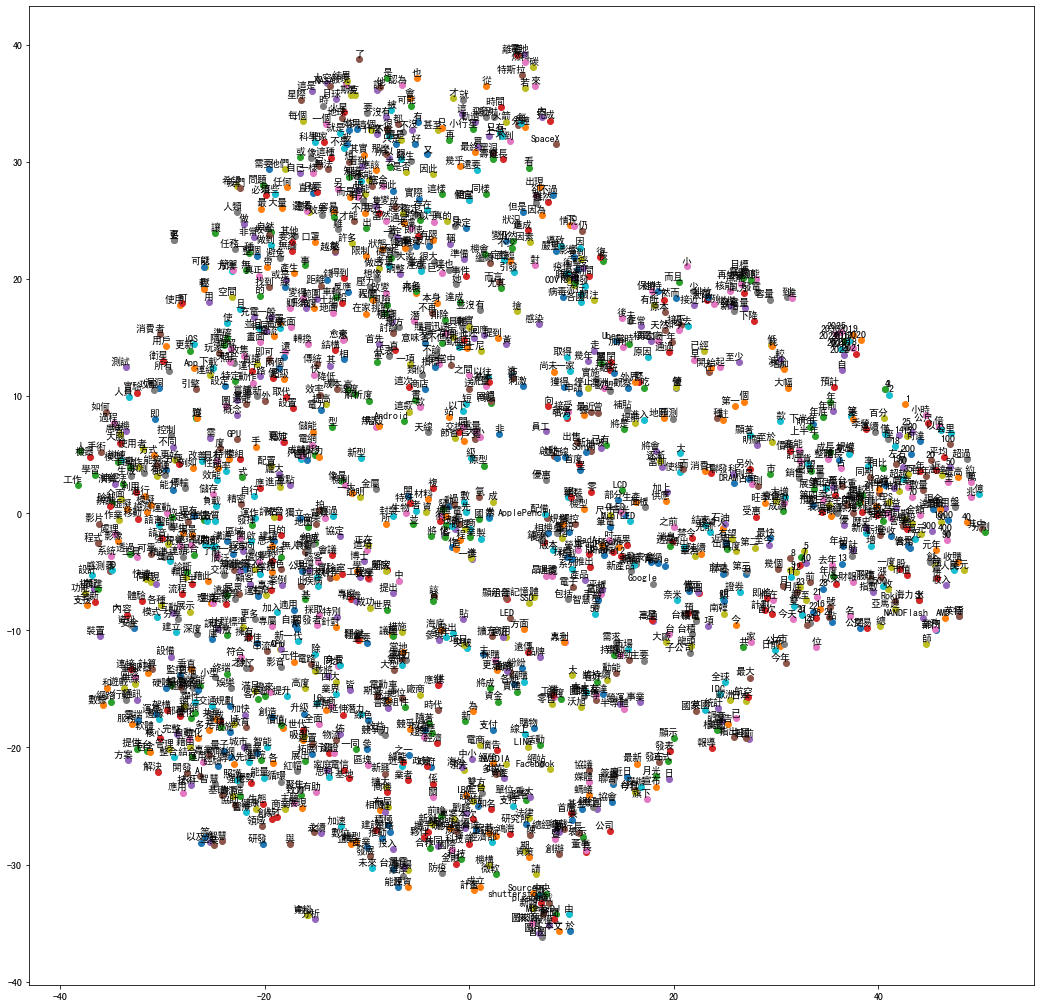

In [8]:
print("與蘋果及產品相關的詞彙:", model.wv.most_similar(positive=['蘋果','產品']))
print("與三星相關的詞彙:", model.wv.most_similar(positive=['三星']))
print("蘋果與iPhone的相似度", model.wv.similarity('蘋果', 'iPhone'))
tsne_plot(model)